<a href="https://colab.research.google.com/github/Bhavin52/ML_Application/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.2 MB 68.7 MB/s 


In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns


In [3]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [4]:
import statistics
from itertools import product
from scipy.cluster import hierarchy

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import silhouette_score

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df = df.drop(['CustomerID'], axis = 1)
df['Annual Income (k$)'] = 1000 * df['Annual Income (k$)']
df.rename(columns = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace = True)
print('There are {} missing values in the dataframe'.format(df.isna().sum().sum()))
df.head()

There are 0 missing values in the dataframe


,Gender,Age,Annual Income,Spending Score
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [13]:
summary = pd.DataFrame(df.describe())
summary = summary.style.background_gradient(cmap = 'Reds') \
          .set_table_attributes("style = 'display: inline'") \
          .set_caption('Statistics of the Dataset') \
          .set_table_styles([{
                'selector': 'caption',
                'props': [
                    ('font-size', '16px')
                ]
          }])
summary

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


Exploratory Data Analysis (EDA)


In [21]:
gender = df['Gender'].value_counts()

fig = plt.figure(
    FigureClass = Waffle, 
    rows = 4,
    columns = 8,
    values = gender,
    colors = ('#B13167', '#3274A1'),
    labels = ['{} - {}'.format(a, b) for a, b in zip(gender.index, gender)],
    legend = {
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1), 
        'fontsize': 15, 
        'labelcolor': 'linecolor',
        'title': 'Gender',
        'title_fontsize': 15,
        'facecolor': 'white'
        },
    font_size = 75, 
    icons = ['venus', 'mars'],
    icon_legend = True,
    figsize = (15, 8),
    facecolor = 'black'
)

plt.title('Gender Distribution', fontsize = 25, color = 'white')
plt.show()

TypeError: ignored

In [22]:
def generate_plotly_distributions_by_gender(feature_name):
    
    fig = px.violin(
                    df, 
                    x = 'Gender', 
                    y = feature_name, 
                    color = 'Gender', 
                    box = True, 
                    points = 'all',
                    template = 'plotly_dark'
    )

    fig.update_layout(
         autosize = False,
         width = 800,
         height = 800,
         title = dict(
             text = '<b> Distribution of ' + feature_name + ' by Gender</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         legend_title = '<b>Gender</b>',
         xaxis_title = '<b>Gender</b>',
         yaxis_title = '<b> ' + feature_name + ' </b>'
    )

    fig.show()
    
generate_plotly_distributions_by_gender(df.columns[1])
generate_plotly_distributions_by_gender(df.columns[2])
generate_plotly_distributions_by_gender(df.columns[3])

In [23]:
fig = px.histogram(df, x = 'Annual Income', y = 'Spending Score', 
                   color = 'Gender', color_discrete_sequence = ['#87BE7A', '#0D782A'], 
                   marginal = 'box', hover_data = df.columns,
                   template = 'plotly_dark')

fig.update_layout(
         autosize = False,
         width = 800,
         height = 800,
         title = dict(
             text = '<b>Sum of Spending Scores vs Income for Men and Women</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         legend_title = '<b>Gender</b>',
         xaxis_title = '<b>Annual Income</b>',
         yaxis_title = '<b>Sum of Spending Scores</b>'
)

fig.show()

In [24]:
fig = ff.create_scatterplotmatrix(df, diag = 'box', index = 'Gender', colormap = ['#FFFF01', '#8D00CB'])

fig.update_layout(
    template = 'plotly_dark',
    yaxis_range = [1, 120],
    title = dict(
         text = '<b>Scatter Plot for the Dataset</b>',
         x = 0.5,
         y = 0.95,
         font = dict(
             size = 20
         )
    ),
    width = 800, 
    height = 800)

fig.update_xaxes(showgrid = False, gridcolor = 'black')
fig.update_yaxes(showgrid = False, gridcolor = 'black')
fig.show()

In [25]:
correlations = df.corr()
x = correlations.columns.tolist()
y = correlations.index.tolist()
z = correlations.values

fig = ff.create_annotated_heatmap(x = x, y = y, z = z, 
                                  annotation_text = z.round(2), 
                                  colorscale = 'teal',
                                  hovertemplate = "Correlation of %{x} and %{y}= %{z:.2f}")

fig.update_layout(
    title = dict(
         text = '<b>Feature Correlation</b>',
         x = 0.5,
         y = 0.95,
         font = dict(
             size = 20
         )
    ),
    template = 'plotly_dark',
    width = 800,
    height = 800
)

fig.show()

In [26]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X = df
print(X)

     Gender  Age  Annual Income  Spending Score
0         1   19          15000              39
1         1   21          15000              81
2         0   20          16000               6
3         0   23          16000              77
4         0   31          17000              40
..      ...  ...            ...             ...
195       0   35         120000              79
196       0   45         126000              28
197       1   32         126000              74
198       1   32         137000              18
199       1   30         137000              83

[200 rows x 4 columns]


K-mean clustering


In [27]:
df['Annual Income'] = df['Annual Income'] / 1000 # reduce Y-axis from B to K

In [28]:
distortion = {}

for i in range(1, 16):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0).fit(X)
    distortion.update({i: km.inertia_})

number_of_clusters = list(distortion.keys())
inertia = list(distortion.values())
    
fig = px.line(x = number_of_clusters, y = inertia, markers = True)

fig.update_layout(template = 'plotly_dark',
                  width = 800, 
                  height = 800,
                  title = dict(
                  text = '<b>Elbow Curve</b>',
                     x = 0.5,
                     y = 0.95,
                     font = dict(
                         size = 20
                         )
                  ),
                  xaxis_title = '<b>Number of Clusters</b>',
                  yaxis_title = '<b>Inertia</b>'
)

fig.update_traces(marker = dict(
    size = 7, 
    color = '#B7E0F7')
)

fig.add_annotation(x = 5, y = 75000, 
                   showarrow = True, 
                   text = 'Optimal Clusters', 
                   arrowhead = 1, 
                   arrowsize = 2,
                   ax = 7,
                   ay = -100,
                   bordercolor = '#FFFF01',
                   borderpad = 3
                  )

fig.show()

In [29]:
km = KMeans(n_clusters = 5, random_state = 0)
cluster_predictions = km.fit_predict(X)

df['Cluster Segregation'] = cluster_predictions
df = df.sort_values(by = 'Cluster Segregation')
df['Cluster Segregation'] = df['Cluster Segregation'].astype(str)

fig = px.scatter(df, x = 'Annual Income', 
                 y = 'Spending Score', 
                 color = 'Cluster Segregation', 
                 color_discrete_sequence = px.colors.qualitative.Set2)

fig.update_traces(marker = dict(size = 10, opacity = 0.80))

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title = 'Clusters',
    title = dict(
             text = '<b>K-Means Clustering</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Annual Income</b>',
         yaxis_title = '<b>Sum of Spending Scores</b>'
)

fig.show()

DBSCAN

In [30]:
df = df.drop(columns = ['Cluster Segregation'], axis = 1)
X = df
print(X)


    Gender  Age  Annual Income  Spending Score
0        1   19           15.0              39
44       0   49           39.0              28
42       1   48           39.0              36
40       0   65           38.0              35
38       0   36           37.0              26
..     ...  ...            ...             ...
21       1   25           24.0              73
27       1   35           28.0              61
23       1   31           25.0              73
25       1   29           28.0              82
37       0   30           34.0              73

[200 rows x 4 columns]


In [31]:
eps_values = np.arange(11, 16, 2)
min_samples_values = np.arange(7, 13, 2)
param_list = list(product(eps_values, min_samples_values))

clusters = []
sil_score = []

for param in param_list:
    dbscan = DBSCAN(eps = param[0], min_samples = param[1]).fit(X)
    clusters.append(len(np.unique(dbscan.labels_)))
    sil_score.append(silhouette_score(X, dbscan.labels_))

dbscan_df = pd.DataFrame.from_records(param_list, columns = ['Eps', 'Min Samples'])
dbscan_df['Number of Clusters'] = clusters
dbscan_df['Silhouette Score'] = sil_score
dbscan_df

,Eps,Min Samples,Number of Clusters,Silhouette Score
0,11,7,6,0.040150
1,11,9,5,0.133237
2,11,11,4,0.038394
3,13,7,5,0.122913
4,13,9,5,0.214337
5,13,11,4,0.247195
6,15,7,5,0.289210
7,15,9,5,0.150900
8,15,11,5,0.247290


In [32]:
dbscan_df['Silhouette Score'] = dbscan_df['Silhouette Score'].astype(str)

fig = px.density_heatmap(dbscan_df, x = 'Eps', 
                         y = 'Min Samples', 
                         z = 'Silhouette Score', 
                         histfunc = 'max',
                         text_auto = '.4f',
                         color_continuous_scale = (['#29A0B1', '#167D7F', '#98D7C2', '#DDFFE7'][::-1]),
)

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title='Clusters',
    title = dict(
             text = '<b>DBSCAN Silhouette Scores</b>',
             x = 0.45,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Eps</b>',
         yaxis_title = '<b>Min Samples</b>'
)

fig.show()

In [33]:
dbscan_df['Silhouette Score'] = dbscan_df['Silhouette Score'].astype(float)
max_sil_score = max(dbscan_df['Silhouette Score'])
dbscan_df[dbscan_df['Silhouette Score'] == max_sil_score]

,Eps,Min Samples,Number of Clusters,Silhouette Score
6,15,7,5,0.28921


In [34]:
dbscan = DBSCAN(eps = 15, min_samples = 7).fit(X)
df['DBSCAN Clusters'] = dbscan.labels_
df = df.sort_values(by = ['DBSCAN Clusters'])
df

,Gender,Age,Annual Income,Spending Score,DBSCAN Clusters
0,1,19,15.0,39,-1
196,0,45,126.0,28,-1
197,1,32,126.0,74,-1
192,1,33,113.0,8,-1
184,0,41,99.0,39,-1
...,...,...,...,...,...
140,0,57,75.0,5,3
144,1,25,77.0,12,3
148,0,34,78.0,22,3
152,0,44,78.0,20,3


In [35]:
df['DBSCAN Clusters'] = df['DBSCAN Clusters'].astype(str)
df['DBSCAN Clusters'] = df['DBSCAN Clusters'].apply(lambda x: 'Outliers' if x == str(-1) else x)

fig = px.scatter(df, x = 'Annual Income', 
                 y = 'Spending Score', 
                 color = 'DBSCAN Clusters', 
                 color_discrete_sequence = ['#FFFFFF', '#F60195', '#0091F7', '#0FF74D', '#F7F700'])

fig.update_traces(marker = dict(size = 10, opacity = 0.80))

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title = 'Clusters',
    title = dict(
             text = '<b>DBSCAN Clusters</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Annual Income</b>',
         yaxis_title = '<b>Sum of Spending Scores</b>'
)

fig.show()

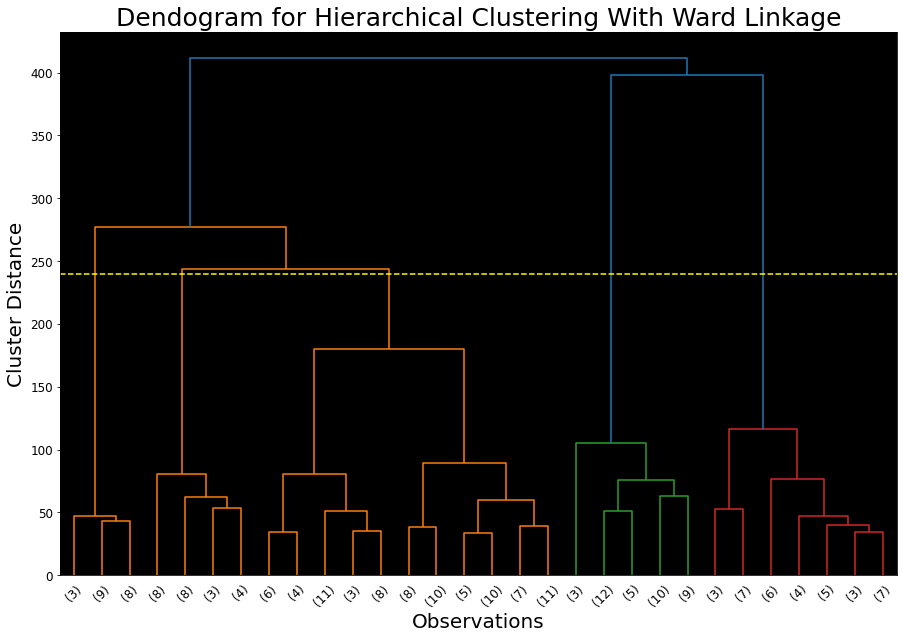

In [36]:
df.drop(columns = ['DBSCAN Clusters'], axis = 1, inplace = True)
X.drop(columns = ['DBSCAN Clusters'], axis = 1, inplace = True)
X = df

plt.figure(figsize = (15, 10))
ax = plt.axes()
ax.set_facecolor('black')
ax = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'), truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Dendogram for Hierarchical Clustering With Ward Linkage', fontsize = 25)
plt.axhline(y = 240, color = 'yellow', linestyle = '--')
plt.xlabel('Observations', fontsize = 20)
plt.ylabel('Cluster Distance', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [37]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(X)
df['Agglomerative Clusters'] = ac
df.sort_values(by = 'Agglomerative Clusters')

df['Agglomerative Clusters'] = df['Agglomerative Clusters'].astype(str)

fig = px.scatter(df, x = 'Annual Income', 
                 y = 'Spending Score', 
                 color = 'Agglomerative Clusters', 
                 color_discrete_sequence = px.colors.qualitative.Set1)

fig.update_traces(marker = dict(size = 10, opacity = 0.80))

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title = 'Clusters',
    title = dict(
             text = '<b>Hierarchical Agglomerative Clustering</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Annual Income</b>',
         yaxis_title = '<b>Sum of Spending Scores</b>'
)

fig.show()

Affinity Propagation

In [38]:
df.drop(columns = ['Agglomerative Clusters'], axis = 1, inplace = True)

ap_clusters, ap_sil_score = [], []
pref = range(-15000, -5000, 100)

for p in pref:
    ap = AffinityPropagation(preference = p).fit(X)
    ap_clusters.append(len(np.unique(ap.labels_)))
    ap_sil_score.append(silhouette_score(X, ap.labels_))
    
ap_df = pd.DataFrame()
ap_df['Preference'] = pref
ap_df['Number of Clusters'] = ap_clusters
ap_df['Silhouette Score'] = ap_sil_score
ap_df = ap_df.sort_values(by = 'Silhouette Score', ascending = False)
ap_df

,Preference,Number of Clusters,Silhouette Score
32,-11800,6,0.451356
2,-14800,6,0.451202
3,-14700,6,0.451202
5,-14500,6,0.451202
44,-10600,6,0.451151
...,...,...,...
95,-5500,9,0.409136
96,-5400,9,0.409136
99,-5100,9,0.409136
36,-11400,6,0.407764


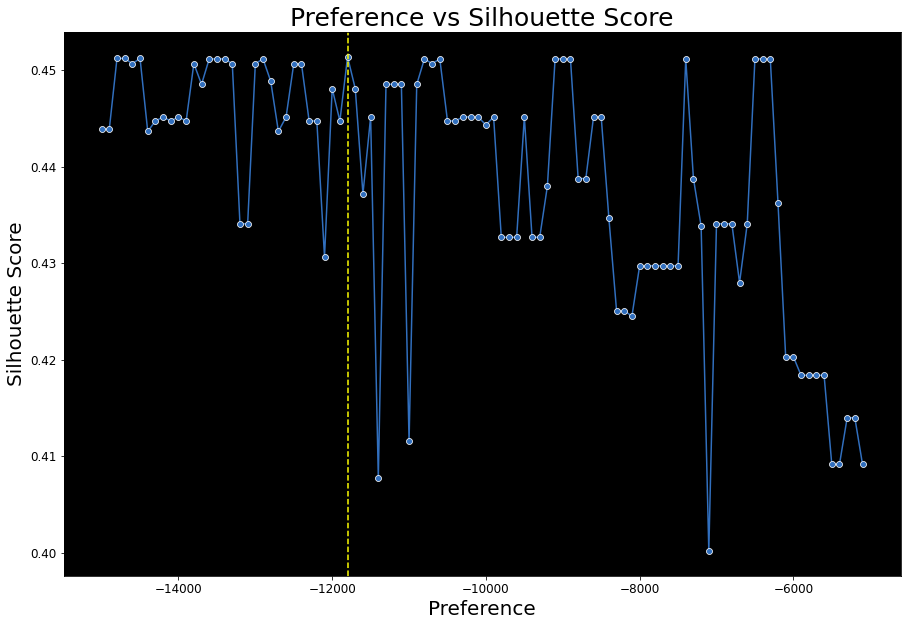

In [39]:
plt.figure(figsize = (15, 10))
ax = plt.axes()
ax.set_facecolor('black')
ax = sns.lineplot(ap_df['Preference'], ap_df['Silhouette Score'], marker = 'o', color = '#316FBE')
plt.axvline(x = -11800, color = 'yellow', linestyle = '--')
plt.title('Preference vs Silhouette Score', fontsize = 25)
plt.xlabel('Preference', fontsize = 20)
plt.xticks(size = 12)
plt.ylabel('Silhouette Score', fontsize = 20)
plt.yticks(size = 12)
plt.show()

In [40]:
ap = AffinityPropagation(preference = -11800).fit(X)
df['AP Clusters'] = ap.labels_
df = df.sort_values(by = 'AP Clusters')

df['AP Clusters'] = df['AP Clusters'].astype(str)

fig = px.scatter(df, x = 'Annual Income', 
                 y = 'Spending Score', 
                 color = 'AP Clusters', 
                 color_discrete_sequence = px.colors.qualitative.D3)

fig.update_traces(marker = dict(size = 10, opacity = 0.80))

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title = 'Clusters',
    title = dict(
             text = '<b>Affinity Propagation</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Annual Income</b>',
         yaxis_title = '<b>Sum of Spending Scores</b>'
)

fig.show()

3D Visualization of the Clusters

In [45]:
def create_3d_cluster_visualizations():

    df_3d_viz = pd.read_csv("/content/Mall_Customers.csv")
    df_3d_viz.rename(columns = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace = True)
    df_3d_viz['K-Means Clusters'] = cluster_predictions
    df_3d_viz['DBSCAN Clusters'] = dbscan.labels_
    df_3d_viz['Agglomerative Clusters'] = ac
    df_3d_viz['AP Clusters'] = ap.labels_

    fig = make_subplots(rows = 2,
                        cols = 2,
                        specs = [
                            [{'type': 'scatter3d'}, {'type': 'scatter3d'}],
                            [{'type': 'scatter3d'}, {'type': 'scatter3d'}]
                        ],
                        subplot_titles = (
                             '<b>K-Means Clustering (5 Clusters)</b>',
                             '<b>DBSCAN Clustering (4 clusters)</b>',
                             '<b>Hierarchical Agglomerative Clustering (5 Clusters)</b>',
                             '<b>Affinity Propagation (6 Clusters)</b>')
                       )

    for i in range(len(df_3d_viz['K-Means Clusters'].value_counts())):
        fig.add_trace(
            go.Scatter3d(
                x = df_3d_viz[df_3d_viz['K-Means Clusters'] == i]['Age'],
                y = df_3d_viz[df_3d_viz['K-Means Clusters'] == i]['Annual Income'],
                z = df_3d_viz[df_3d_viz['K-Means Clusters'] == i]['Spending Score'],
                mode = 'markers',
                name = str('K-Means Cluster ' + str(i)),    
                legendgroup = 11,
                marker = dict(
                    size = 8,
                    opacity = 0.9,
                    color = px.colors.qualitative.Set2[i]
                ),
            ),
            row = 1,
            col = 1
        )

    for i, j in enumerate(df_3d_viz['DBSCAN Clusters'].unique()):
        if(j == -1):
            fig.add_trace(
                go.Scatter3d(
                    x = df_3d_viz[df_3d_viz['DBSCAN Clusters'] == j]['Age'],
                    y = df_3d_viz[df_3d_viz['DBSCAN Clusters'] == j]['Annual Income'],
                    z = df_3d_viz[df_3d_viz['DBSCAN Clusters'] == j]['Spending Score'],
                    mode = 'markers',
                    name = 'DBSCAN Outliers',    
                    legendgroup = 12,
                    marker = dict(
                        size = 8,
                        opacity = 0.9,
                        color = px.colors.qualitative.Set1[i + 2]
                    ),
                ),
                row = 1,
                col = 2
            ) 
        else:
            fig.add_trace(
                go.Scatter3d(
                    x = df_3d_viz[df_3d_viz['DBSCAN Clusters'] == j]['Age'],
                    y = df_3d_viz[df_3d_viz['DBSCAN Clusters'] == j]['Annual Income'],
                    z = df_3d_viz[df_3d_viz['DBSCAN Clusters'] == j]['Spending Score'],
                    mode = 'markers',
                    name = str('DBSCAN Cluster ' + str(j)),    
                    legendgroup = 12,
                    marker = dict(
                        size = 8,
                        opacity = 0.9,
                        color = px.colors.qualitative.Set1[i + 2]
                    ),
                ),
                row = 1,
                col = 2
            ) 


    for i in range(len(df_3d_viz['Agglomerative Clusters'].value_counts())):
        fig.add_trace(
            go.Scatter3d(
                x = df_3d_viz[df_3d_viz['Agglomerative Clusters'] == i]['Age'],
                y = df_3d_viz[df_3d_viz['Agglomerative Clusters'] == i]['Annual Income'],
                z = df_3d_viz[df_3d_viz['Agglomerative Clusters'] == i]['Spending Score'],
                mode = 'markers',
                name = str('Hierarchical Cluster ' + str(i)),   
                legendgroup = 21,
                marker = dict(
                    size = 8,
                    opacity = 0.9,
                    color = px.colors.qualitative.Set1[i + 3]
                ),
            ),
            row = 2,
            col = 1
        )

    for i in range(len(df_3d_viz['AP Clusters'].value_counts())):
        fig.add_trace(
            go.Scatter3d(
                x = df_3d_viz[df_3d_viz['AP Clusters'] == i]['Age'],
                y = df_3d_viz[df_3d_viz['AP Clusters'] == i]['Annual Income'],
                z = df_3d_viz[df_3d_viz['AP Clusters'] == i]['Spending Score'],
                mode = 'markers',
                name = str('AP Cluster ' + str(i)),   
                legendgroup = 22,
                marker = dict(
                    size = 8,
                    opacity = 0.9,
                    color = px.colors.qualitative.D3[i]
                ),
            ),
            row = 2,
            col = 2
        )

    fig.update_layout(
        template = 'plotly_dark',
        title = dict(         
                     text = '<b>3D Visualization of Clustering Algorithms</b>',
                     x = 0.5,
                     y = 0.95,
                     font = dict(        
                         size = 20
                     ),
             ),
        width = 1300,
        height = 1000,
        scene1 = dict(
            aspectmode = 'cube',
            xaxis = dict(
                title = 'Age'
            ),
            yaxis = dict(
                title = 'Annual Income',
            ),
            zaxis = dict(
                title = 'Spending Score',
            ),
        ),
        scene2 = dict(
            aspectmode = 'cube',
            xaxis = dict(
                title = 'Age'
            ),
            yaxis = dict(
                title = 'Annual Income',
            ),
            zaxis = dict(
                title = 'Spending Score',
            ),
        ),
        scene3 = dict(
            aspectmode = 'cube',
            xaxis = dict(
                title = 'Age'
            ),
            yaxis = dict(
                title = 'Annual Income',
            ),
            zaxis = dict(
                title = 'Spending Score',
            ),
        ),
        scene4 = dict(
            aspectmode = 'cube',
            xaxis = dict(
                title = 'Age'
            ),
            yaxis = dict(
                title = 'Annual Income',
            ),
            zaxis = dict(
                title = 'Spending Score',
            ),
        )
    )

    fig.show()
    
create_3d_cluster_visualizations()